In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

print ("The libraries have been loaded.")

The libraries have been loaded.


In [2]:
data = pd.read_csv('./housing.csv')

In [26]:
#Descrevendo as variáveis, para identificar dados que possivelmente precisem de alterações ou manipulações para gerar novos dados.
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,1.166153,5.431344,0.213039,3.071533
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,1.420135,2.482946,0.057983,10.438269
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000,4.441441,0.175427,2.429032
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,1.000000,5.230769,0.203162,2.817582
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000,6.052381,0.239821,3.281513
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000,141.909091,1.000000,1243.333333


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20433 non-null  float64
 1   latitude                  20433 non-null  float64
 2   housing_median_age        20433 non-null  float64
 3   total_rooms               20433 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20433 non-null  float64
 6   households                20433 non-null  float64
 7   median_income             20433 non-null  float64
 8   median_house_value        20433 non-null  float64
 9   ocean_proximity           20433 non-null  int32  
 10  rooms_per_household       20433 non-null  float64
 11  bedrooms_per_room         20433 non-null  float64
 12  population_per_household  20433 non-null  float64
dtypes: float64(12), int32(1)
memory usage: 2.1 MB


In [78]:
#Using a technique called feature engineering, witch is mainly used for creating new variables using others that already exist in the database. The goal is to simplify and speed up data transformations while also enhancing model accuracy.
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_household"]=data["population"]/data["households"]
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,6.281853,0.172096,2.181467


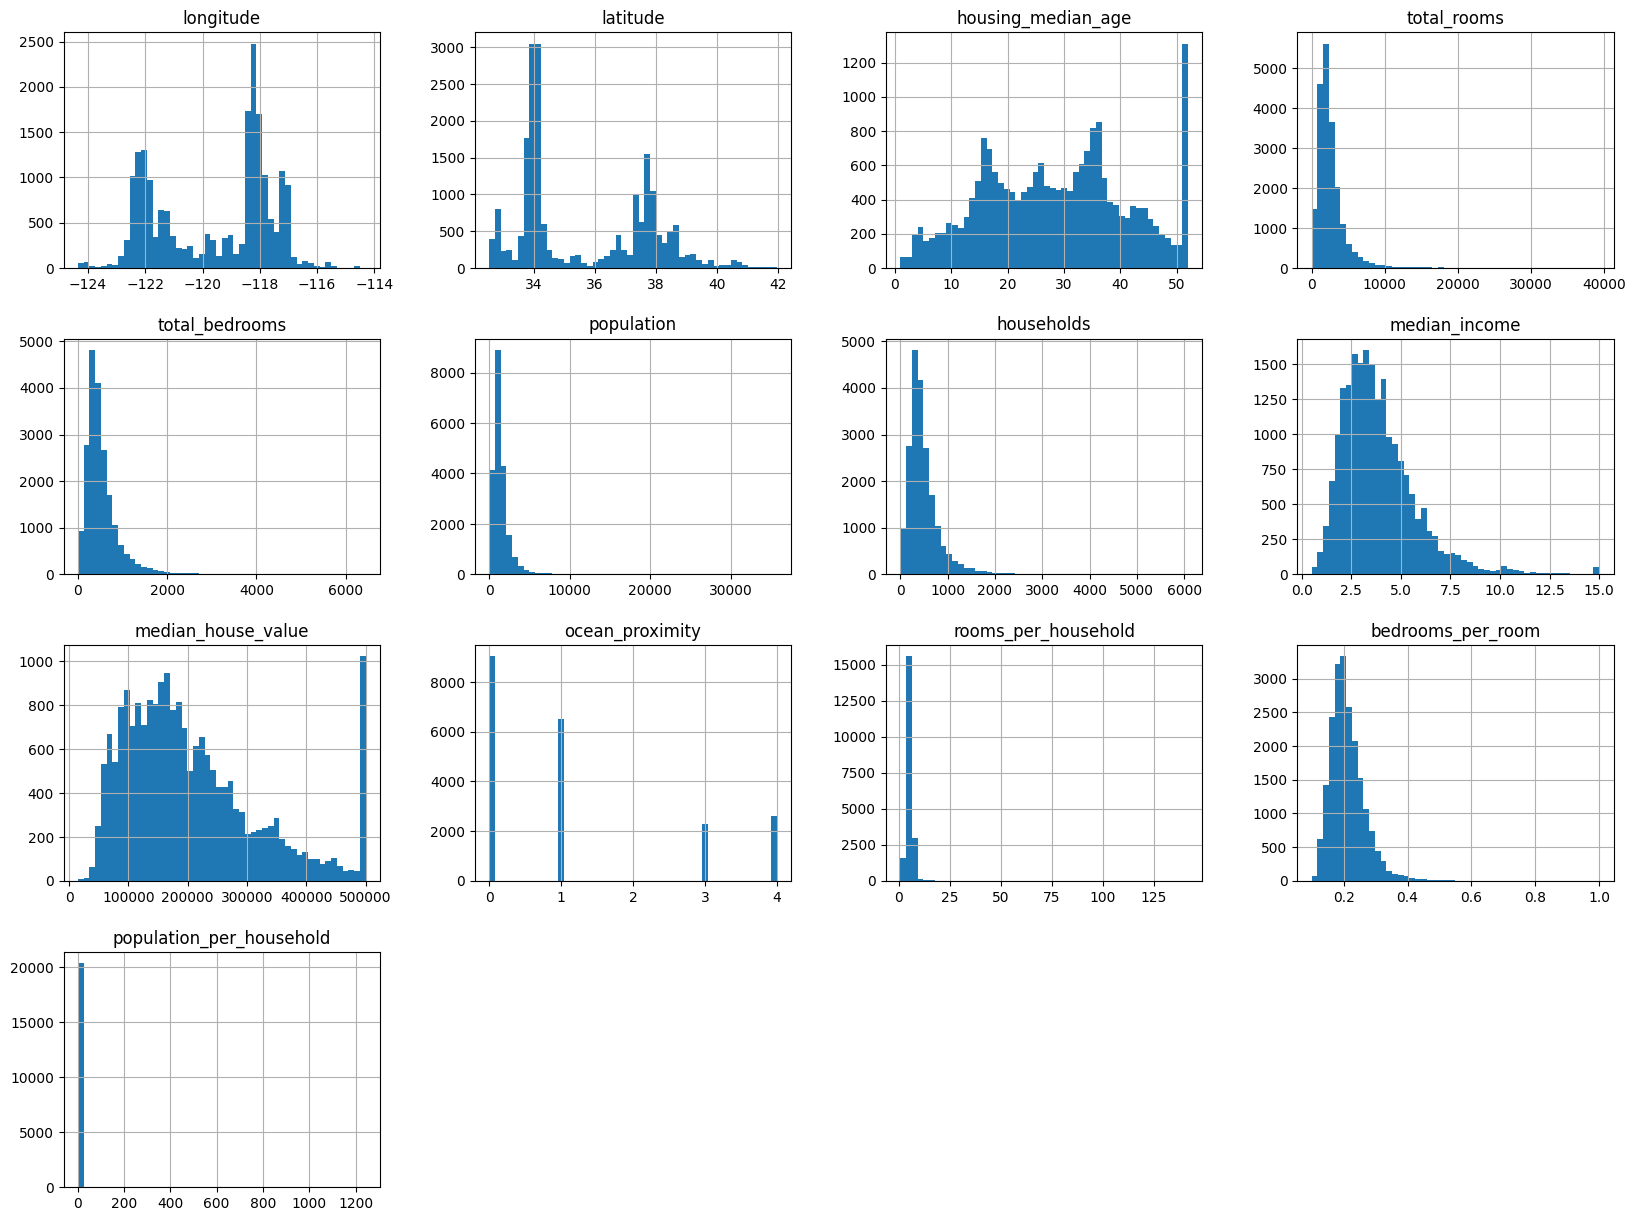

In [57]:
#Data analysis is one of the most important part of Machine Learning. Getting used to doing plots and visualizing data will help you know not only the quantity of them and the way that they variate, but how important they are for the dependent variable y.
data.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

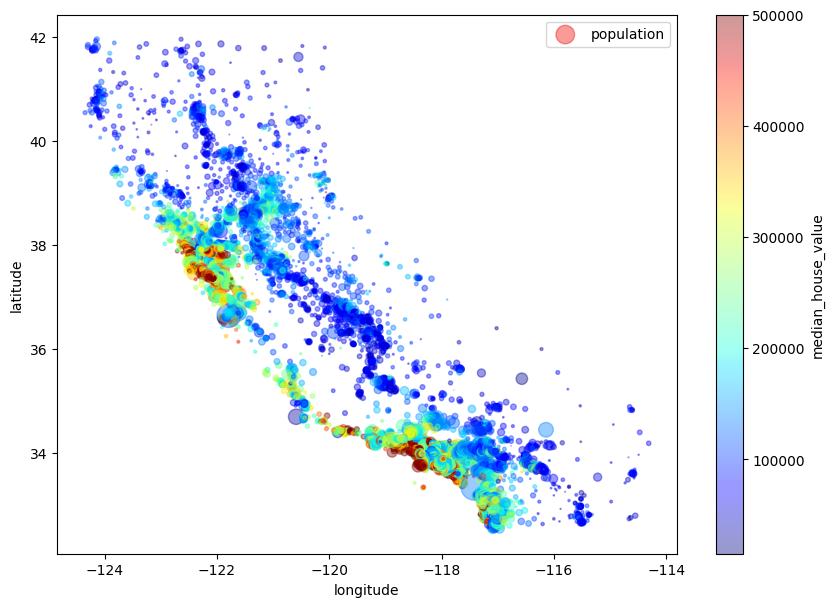

In [56]:
# In this plot we are showing where it seems to be the most expensive region in California, using the data that was collected and using latitude and longitude, we can plot it into the map. The model that we want to create will serve for us to predict values for areas that were not marked already in the map. Knowing that the have a good data quality, we can make really precise predictions.

data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=data["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)


In [83]:
#Working with categorical variables and transforming it to numerical, on our way to make the data ready for the ML algorithm.
#Defining a variable related to the library
ocean = LabelEncoder()
#Using the function in the column that we want to transform. This line of code will transform data, for example: when the string data is inland, near ocean or near bay it will convert to 1,2,3.
data['ocean_proximity'] = ocean.fit_transform(data['ocean_proximity'])
#In this line we want to make a column for every variable that haves into the ocean_proximity label, witch is inland, near_ocean, near_bay and island. For example, if our row is inland, we want inland to be valued as 1 and the rest as 0. The value [9] is the position of the ocean proximity position in the column
ocean_hot = ColumnTransformer(transformers=[('encode', OneHotEncoder(), [9])], remainder='passthrough')
#creating a new data with the categorical data transformed
new_data = ocean_hot.fit_transform(data)
#Creating a DataFrame
new_data = pd.DataFrame(new_data)
#Defining its columns
new_data.columns =['<1H_OCEAN', 
    'INLAND', 
    'NEAR_OCEAN',
    'NEAR_BAY', 
    'ISLAND', 
    'longitude', 
    'latitude', 
    'housing_median_age', 
    'total_rooms', 
    'total_bedrooms', 
    'population', 
    'households', 
    'median_income',
    'median_house_value',
    'rooms_per_household',
    'bedrooms_per_room',
    'population_per_household']

new_data.head(9999)

,<1H_OCEAN,INLAND,NEAR_OCEAN,NEAR_BAY,ISLAND,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,0.0,0.0,0.0,1.0,0.0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556
1,0.0,0.0,0.0,1.0,0.0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842
2,0.0,0.0,0.0,1.0,0.0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260
3,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945
4,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,1.0,0.0,0.0,0.0,0.0,-117.94,33.93,33.0,1770.0,370.0,1346.0,366.0,4.0833,162500.0,4.836066,0.209040,3.677596
9995,1.0,0.0,0.0,0.0,0.0,-117.94,33.93,34.0,1475.0,319.0,698.0,293.0,3.8194,186000.0,5.034130,0.216271,2.382253
9996,1.0,0.0,0.0,0.0,0.0,-117.94,33.93,14.0,999.0,232.0,1037.0,244.0,2.7125,166100.0,4.094262,0.232232,4.250000
9997,1.0,0.0,0.0,0.0,0.0,-117.95,33.93,25.0,3445.0,801.0,2400.0,750.0,3.4702,161900.0,4.593333,0.232511,3.200000


In [84]:
#Dropping independent and dependent variables
x = new_data.drop('median_house_value', axis =1)
y= new_data['median_house_value']

#scaler = MinMaxScaler()
#x = scaler.fit_transform(x)
#x = pd.DataFrame(x)

In [96]:
#Searching for the best model
#Creating train and test variables
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#Small function to display the scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
#calling the library
lr = LinearRegression()
#Fitting the training data
lr.fit(x_train,y_train)
#Some data that we want to use as benchmark
some_data = x_test.iloc[:5]
some_label = y_test.iloc[:5]
#printing some informati on about the prediction
print(f'Predictions:  {(lr.predict(some_data))}')
#actual values
print(f'Labels: {list(some_label)}')
#benchmarking the values using the the test set
y_pred = lr.predict(x_test)
lr_mse = mean_squared_error(y_test,y_pred)
lr_rse = np.sqrt(lr_mse)
display_scores(lr_rse)
#This is an example of a model underfitting the training data, knowing that the prices of a house range from $120.000 to $265.000 and we are getting a $69.000 deviation. We can now find other models that can solve better the problem


Predictions:  [212233.59330796 146168.34886807 203451.58295572 177543.87775204
 199126.6976565 ]
Labels: [245800.0, 137900.0, 218200.0, 220800.0, 170500.0]
Scores: 69042.79968866646
Mean: 69042.79968866646
Standard deviation: 0.0


In [94]:
lin_scores = cross_val_score(lr, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [64237.27680848 63388.15155272 68169.70187005 70198.47741099
 66970.47192028 65998.61384366 74532.8294136  69701.82212469
 67168.6187997  68784.05069946]
Mean: 67915.00144436365
Standard deviation: 3035.8285446959676


In [108]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)
ytree_pred = tree_reg.predict(x_test)
tree_mse = mean_squared_error(y_test, ytree_pred)
tree_rse = np.sqrt(tree_mse)

In [109]:
print(f'Relative Standard Error: {tree_rse}')
scores = cross_val_score(tree_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)
#We are still not getting good values from the predictors, with the value difference being over $70.000 dolars

Relative Standard Error: 68377.7657844608
Scores: [68419.88790068 67748.60033431 78438.5988366  76626.23334804
 69364.40100577 66805.35557316 67000.8739154  72194.75977924
 70487.86318645 70310.6318417 ]
Mean: 70739.72057213626
Standard deviation: 3767.8452415883003


In [90]:
dectree= DecisionTreeRegressor()
dectree.fit(x_train,y_train)
some_data = x_test.iloc[:5]
some_label = y_test.iloc[:5]
print(f'Predictions:  {(dectree.predict(some_data))}')
print(f'Labels: {list(some_label)}')

scores = cross_val_score(dectree, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Predictions:  [220000. 134600. 236500. 122000. 181400.]
Labels: [245800.0, 137900.0, 218200.0, 220800.0, 170500.0]
Scores: [68742.06374016 67196.73024512 78012.90234962 76575.96335239
 68911.88699144 66986.38113666 71592.33407261 72197.05419166
 69727.93745679 70535.29048349]
Mean: 71047.85440199272
Standard deviation: 3519.9382377125057


In [47]:
#This seems to be the best model!
forest = RandomForestRegressor()
forest.fit(x_train,y_train)
forest_scores = cross_val_score(forest, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

#Searching for accuracy and loss on every hyperparameter to find the one with the best performance

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]}, {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,2,4]},
]

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

#This model stil have a deviation of $49.000 dolars, but seems to be the best! The idea is to find the model that adapts itself the best for the data that is being analysed, in this case we are still not using neural networks or suported vector machines, witch can lead to a higher precision!

Scores: [47399.71936888 46563.92036132 52603.29207852 53449.56044895
 49387.73089036 46801.44097573 49596.52643419 50829.37309036
 48347.59753098 50628.33477275]
Mean: 49560.749595204434
Standard deviation: 2233.759898507788
{'max_features': 6, 'n_estimators': 30}
65236.449257075285 {'max_features': 2, 'n_estimators': 3}
55278.79150855008 {'max_features': 2, 'n_estimators': 10}
52259.308051362095 {'max_features': 2, 'n_estimators': 30}
59586.68009344212 {'max_features': 4, 'n_estimators': 3}
52336.539310057546 {'max_features': 4, 'n_estimators': 10}
49889.280094411064 {'max_features': 4, 'n_estimators': 30}
59265.56774270993 {'max_features': 6, 'n_estimators': 3}
51387.89499025453 {'max_features': 6, 'n_estimators': 10}
49419.45398684193 {'max_features': 6, 'n_estimators': 30}
58383.43667527534 {'max_features': 8, 'n_estimators': 3}
51426.880284276645 {'max_features': 8, 'n_estimators': 10}
49583.248184229975 {'max_features': 8, 'n_estimators': 30}
62123.4346328887 {'bootstrap': False,